In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Data Pre-Processsing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/chuka/Exercises/CAPSTONE PROJECT/Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATA DICTIONARY

1. CustomerID: A unique identifier assigned to each telecom customer, enabling
tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or
female. This information helps in analyzing gender-based trends in
customer churn.
3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen
or not. This attribute helps in understanding if there are any specific
churn patterns among senior customers.
4. Partner: Indicates whether the customer has a partner or not. This attribute helps
in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute
helps in assessing the influence of having dependents on customer
churn.
6. Tenure: The duration for which the customer has been subscribed to the telecom
service. It represents the loyalty or longevity of the customer’s
relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute
helps in understanding the impact of phone service on churn.
8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing
the effect of having multiple lines on customer churn.
9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic,
or no internet service. It helps in evaluating the relationship between internet service and
churn.
10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in
analyzing the impact of online security on customer churn.
11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in
evaluating the impact of online backup on churn behavior.
12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps
in understanding the influence of device protection on churn.
13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps
in assessing the impact of tech support on churn behavior.
14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in
evaluating the impact of streaming TV on customer churn.
15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence
of streaming movies on churn behavior.
16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial
factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of
paperless billing on customer churn.
18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit
cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly
charges and churn behavior.
20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the
customer and may have an impact on churn.
21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to
predict in telecom customer churn analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
# Replacing all null values in the TotalCharges column with the median of 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check the result
print(df['TotalCharges'].isnull().sum())

0


In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


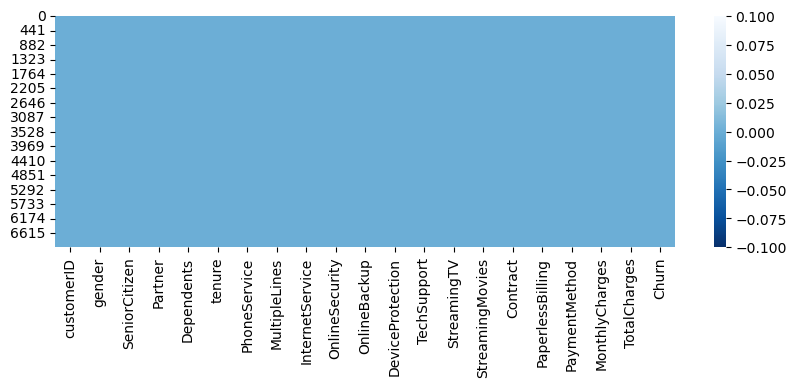

In [8]:
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar = True, cmap = 'Blues_r');

# EDA ON CUSTOMER CHURN

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### Data is highly imbalanced

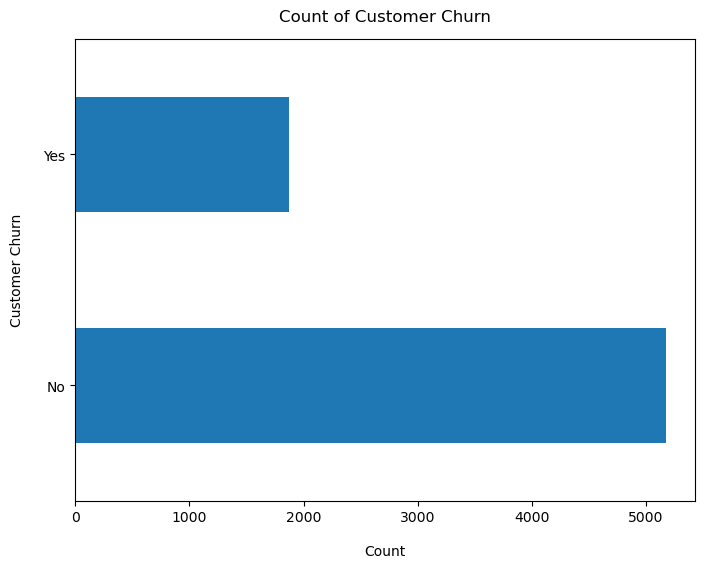

In [12]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Customer Churn", labelpad=14)
plt.title("Count of Customer Churn", y=1.02);

### The number of customers that did not churn are highly greater than the churned customers 

In [13]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2552.882494
Yes,0.254682,17.979133,74.441332,1531.796094


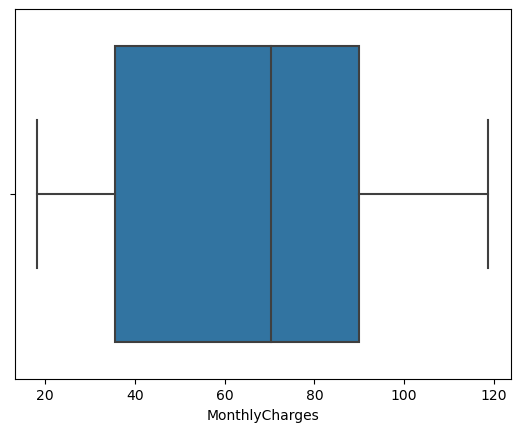

In [14]:
sns.boxplot(x = df['MonthlyCharges']);

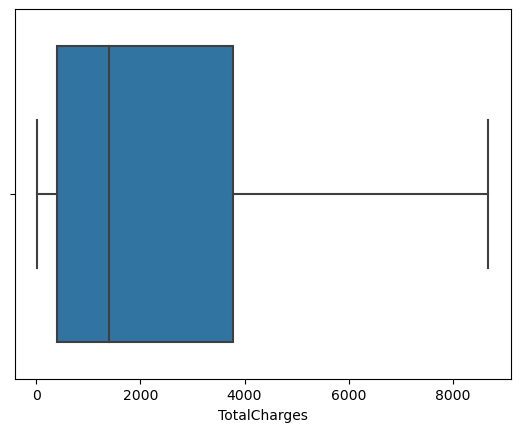

In [15]:
sns.boxplot(x = df['TotalCharges']);

### No outliers in the Total Charges and Monthly Charges column

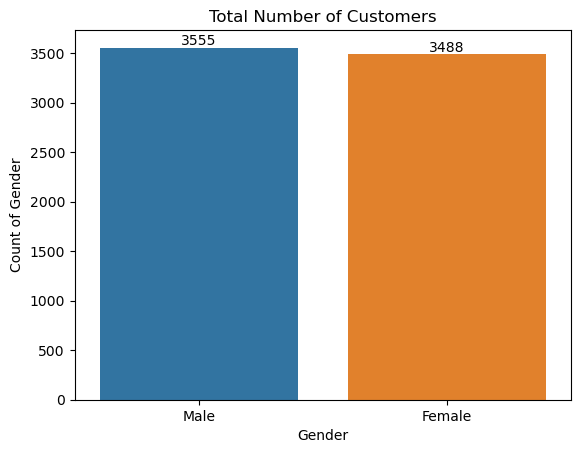

In [16]:
ax = sns.countplot(x = df["gender"], order = df["gender"].value_counts(ascending = False).index)
values = df["gender"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Customers');

### The male customers are slightly higher than the female customers

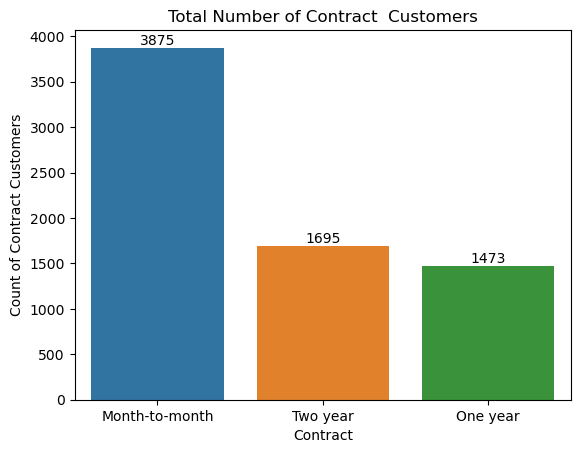

In [17]:
ax = sns.countplot(x = df["Contract"], order = df["Contract"].value_counts(ascending = False).index)
values = df["Contract"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values)
plt.xlabel('Contract')
plt.ylabel('Count of Contract Customers')
plt.title('Total Number of Contract  Customers');

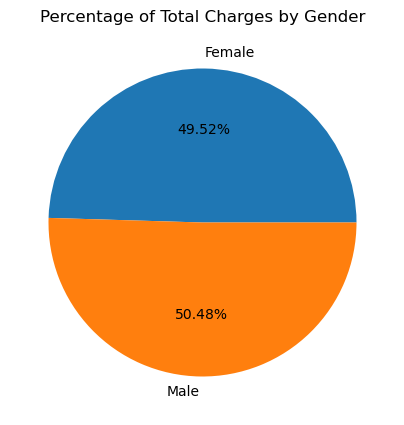

In [18]:
#Total Charges by Customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter (df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.title("Percentage of Total Charges by Gender")
plt.show();   

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
# Get the max tenure
print(df['tenure'].max()) #72

72


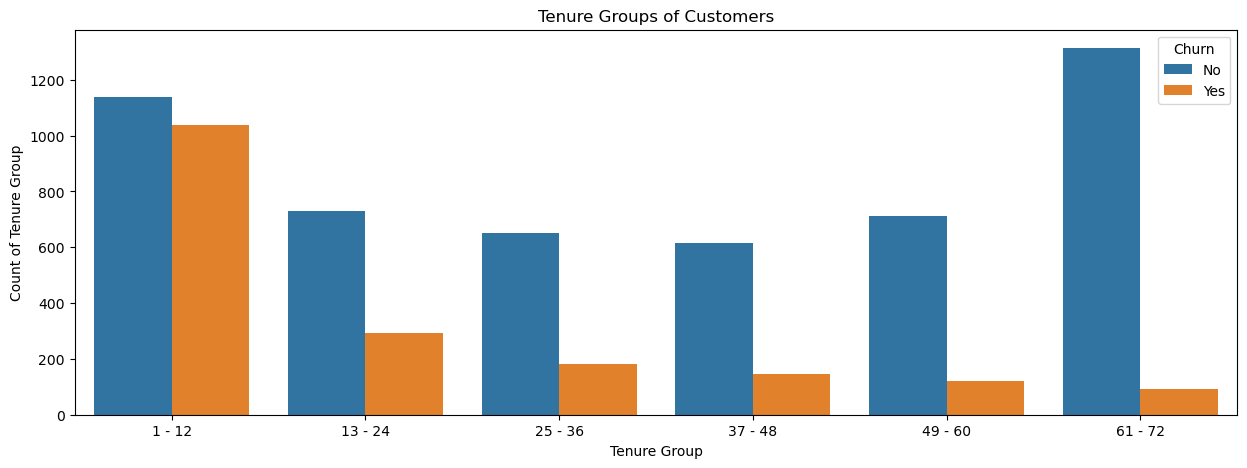

In [21]:
#Data Visualization
#Tenure Group

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

#Visualizations

plt.figure(figsize = (15,5))
sns.countplot(x = 'tenure_group', data = df, hue = "Churn")
plt.xlabel('Tenure Group')
plt.ylabel('Count of Tenure Group')
plt.title('Tenure Groups of Customers');

In [22]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

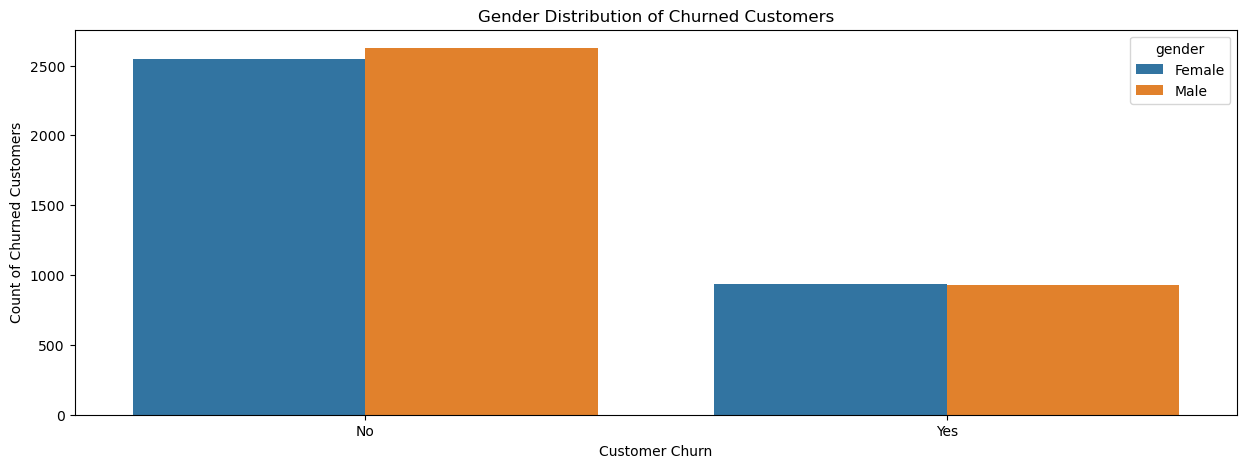

In [23]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Churn', data = df, hue = 'gender')
plt.xlabel('Customer Churn')
plt.ylabel('Count of Churned Customers')
plt.title('Gender Distribution of Churned Customers');

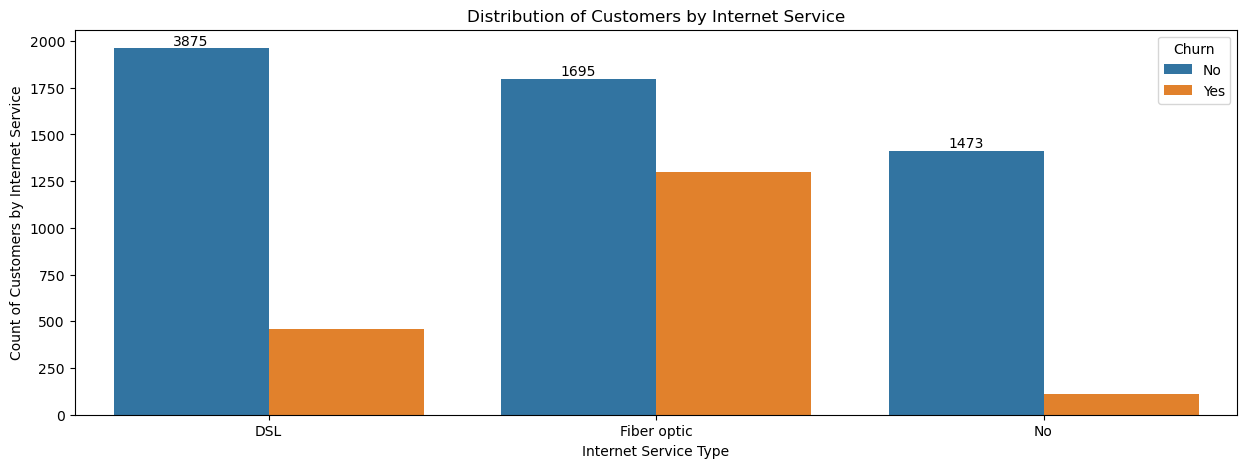

In [24]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'InternetService', data = df, hue = 'Churn')
ax.bar_label(container=ax.containers[0], labels = values)
plt.xlabel('Internet Service Type')
plt.ylabel('Count of Customers by Internet Service')
plt.title('Distribution of Customers by Internet Service');

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


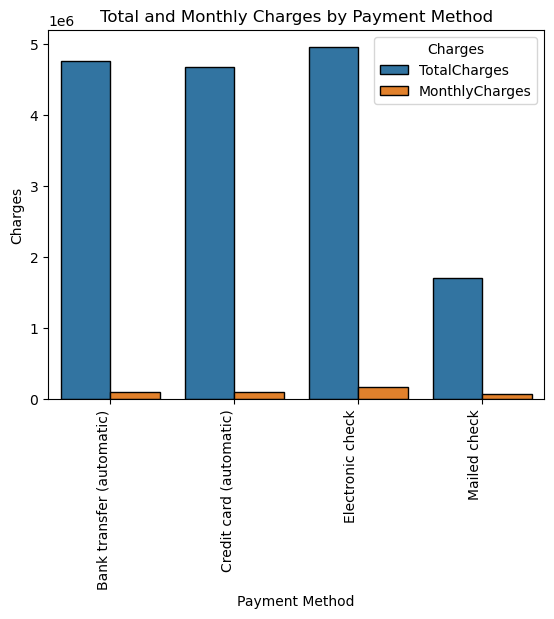

In [26]:
# Payment Method by Total Charges and Monthly Charges 

procat = df.groupby("PaymentMethod")[["TotalCharges", "MonthlyCharges"]].sum().reset_index()
procat = pd.melt(procat, id_vars="PaymentMethod", var_name= "Charges", value_name = "Total")
sns.barplot( data=procat, x="PaymentMethod", y="Total",hue="Charges", linewidth=1,  edgecolor="k")
plt.xlabel("Payment Method")
plt.ylabel("Charges")
plt.title("Total and Monthly Charges by Payment Method")
plt.xticks(rotation=90, ha="right"); #Rotate the labels

### More Customers paid through the Electronic Check payment method and less customers paid through Mailed Check

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

''

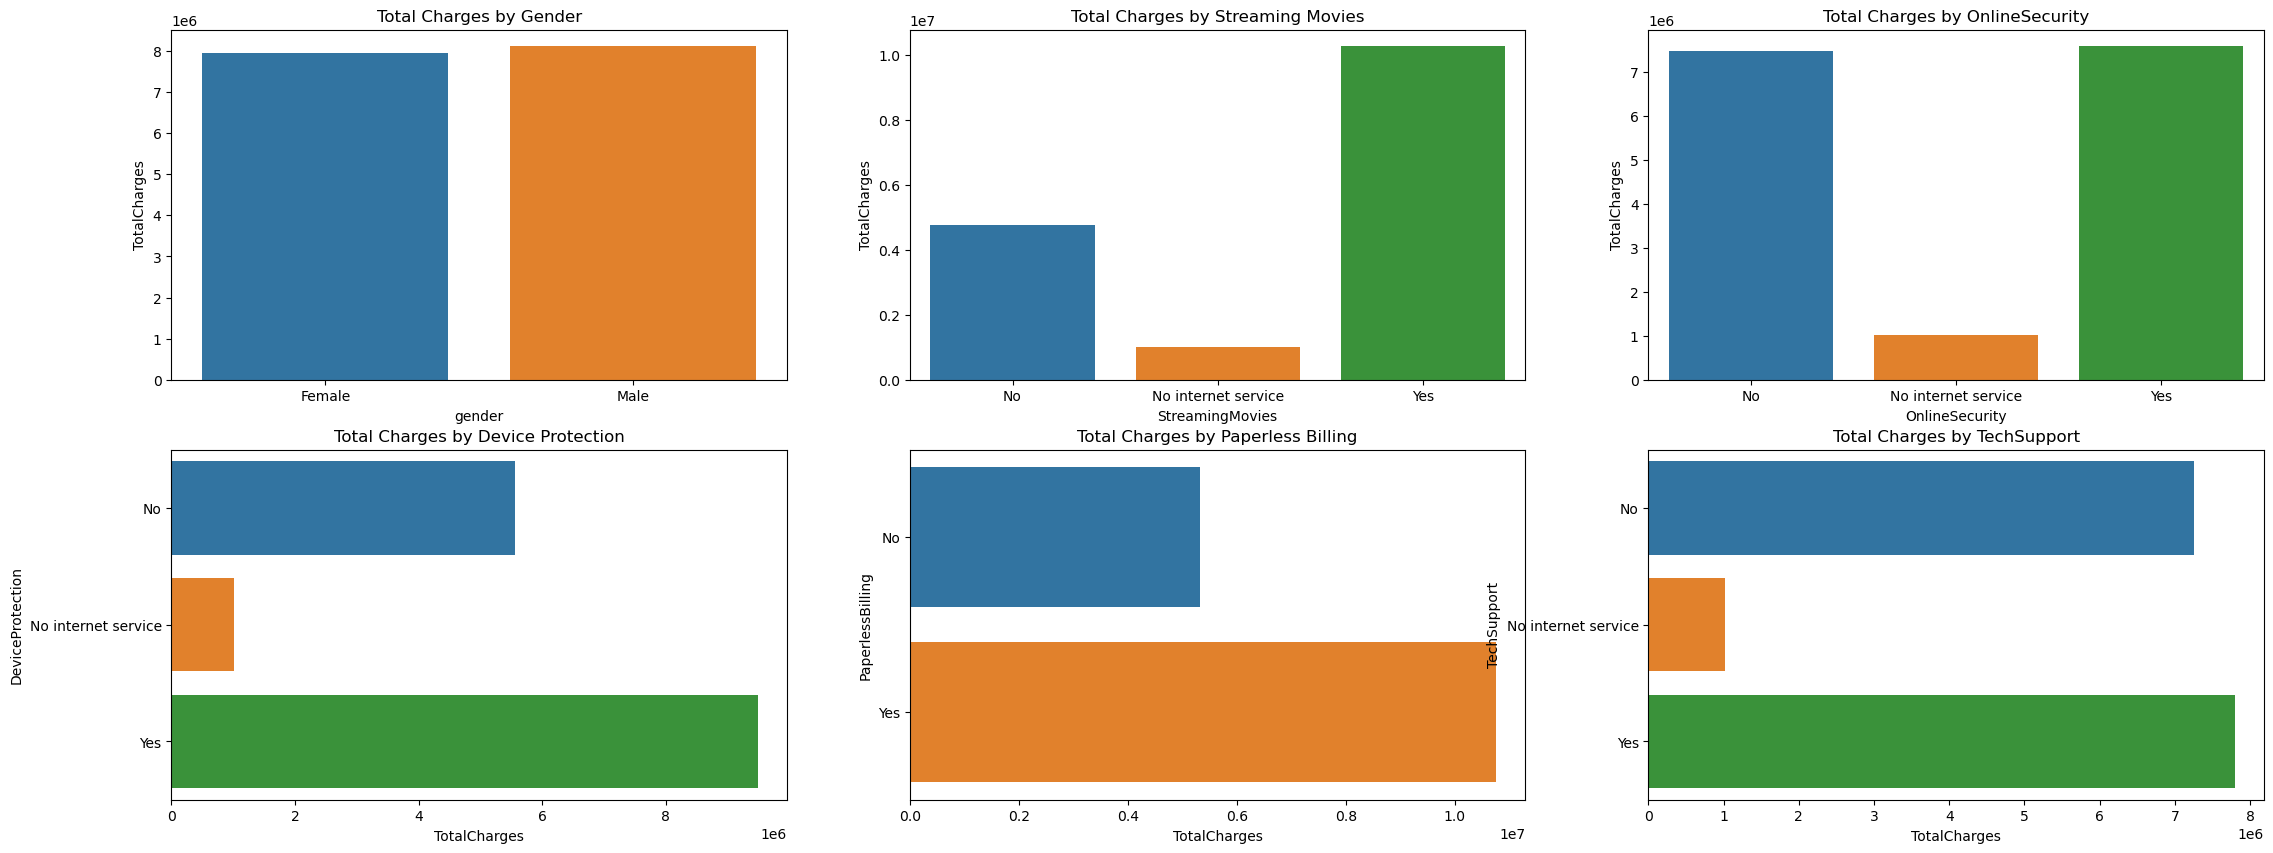

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

tot_gender = df.groupby("gender")["TotalCharges"].sum().reset_index()
sns.barplot(x='gender', data = tot_gender, y='TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total Charges by Gender")

tot_mov = df.groupby ("StreamingMovies")[ "TotalCharges"].sum().reset_index()
sns.barplot (x='StreamingMovies', data=tot_mov, y='TotalCharges', ax=axs[0,1])
axs[0,1].set_title("Total Charges by Streaming Movies")

tot_online = df.groupby("OnlineSecurity")["TotalCharges"].sum().reset_index()
sns.barplot (x='OnlineSecurity', data= tot_online, y='TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges by OnlineSecurity")

tot_device = df.groupby("DeviceProtection")["TotalCharges"].sum().reset_index()
sns.barplot (y = 'DeviceProtection', data = tot_device, x ='TotalCharges', ax=axs[1,0])
axs[1,0].set_title("Total Charges by Device Protection")

tot_paper = df.groupby("PaperlessBilling")["TotalCharges"].sum().reset_index()
sns.barplot (y = 'PaperlessBilling', data= tot_paper, x ='TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total Charges by Paperless Billing")

tot_tech = df.groupby("TechSupport")["TotalCharges"].sum().reset_index()
sns.barplot (y = 'TechSupport', data= tot_tech, x ='TotalCharges', ax=axs[1,2])
axs[1,2].set_title("Total Charges by TechSupport")
;

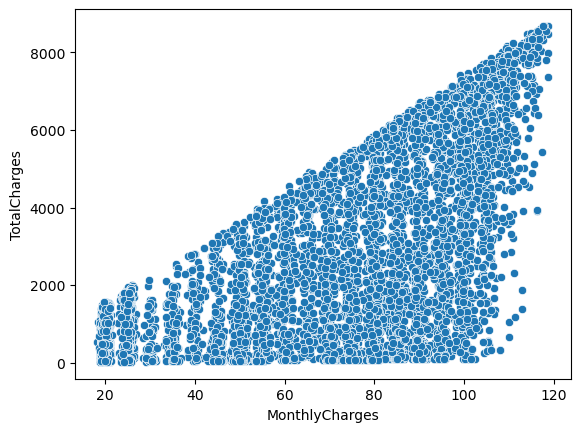

In [29]:
sns.scatterplot (x ='MonthlyCharges', y='TotalCharges', data=df);

### Total Charges increase as Monthly Charges increase

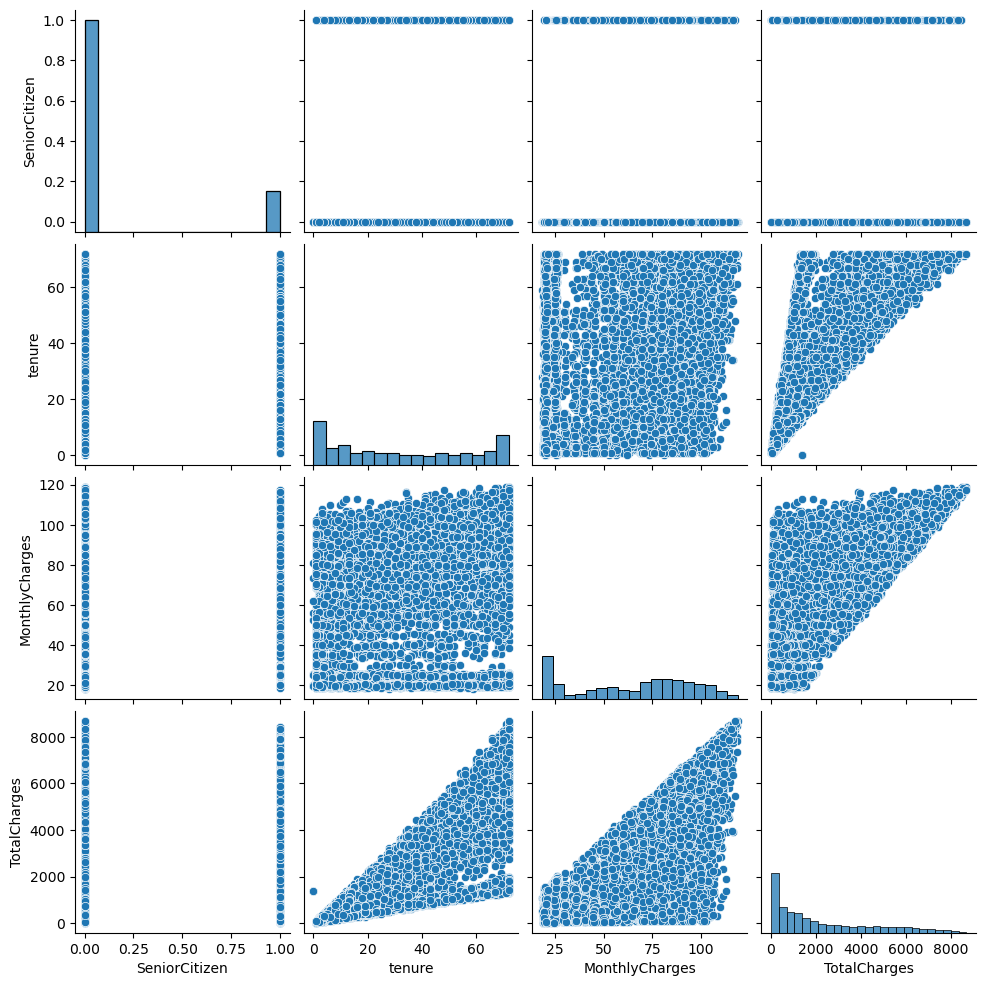

In [30]:
sns.pairplot(df, size = 2.5);

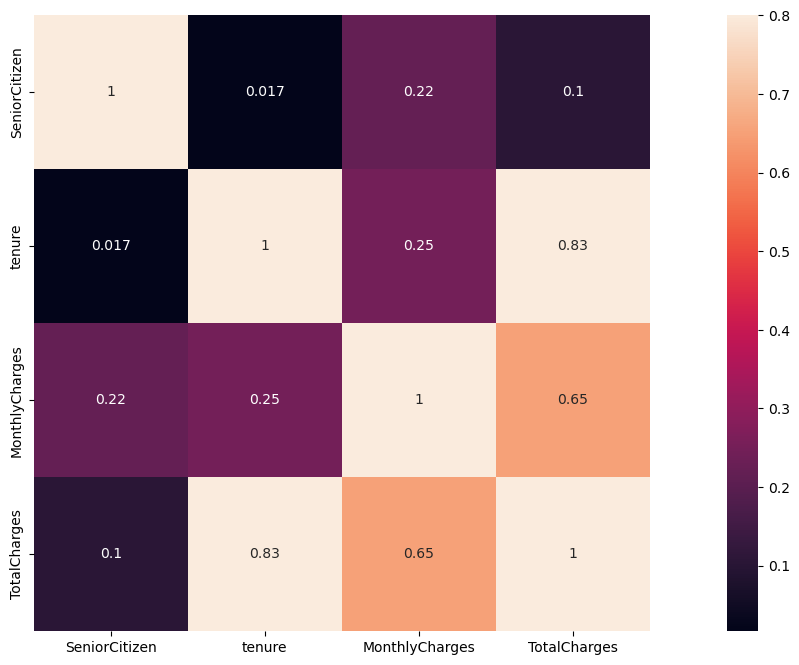

In [31]:
# Correlation Table

a = df.corr()
plt.figure(figsize =(20, 8))
sns.heatmap(a, vmax = .8, square = True, annot = True);



### 1.  There is a strong correlation between Total Charges and Monthly Charges and also between Total Charges and Tenure

### 2. There is a very weak relationship between the Senior Citizen Column and the Tenure and also between the Senior citizen and the Total charges column

# CONCLUSION

1. Electronic check payment users are the highest churners
2. Contract Type - Monthly customers are more likely to churn
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
4. Customers with lesser tenures churned particulary Tenure group of 1-12 months
6. Customers with lower total charges and higher monthly charges churned higher
7. Customers that use fiber optic churn higher
8. The male customers are slightly higher than the female customers

# FEATURE ENGINEERING/DATA PREPROCESSING

In [32]:
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [33]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12


### All columns were converted to numerical values to be able to be used for the machine learning

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [35]:
# Create a copy of the data (Exclude target/Label alongside other columns that was created)

df1 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges']]

label = df[['Churn']]

In [36]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,1,0,0,0,0,1,29.85,29.85
1,1,0,0,0,1,0,1,0,1,0,0,0,0,56.95,1889.50
2,1,0,0,0,1,0,1,1,0,0,0,0,1,53.85,108.15
3,1,0,0,0,0,0,1,0,1,1,0,0,0,42.30,1840.75
4,0,0,0,0,1,0,0,0,0,0,0,0,1,70.70,151.65


In [37]:
label.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [38]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

# MACHINE LEARNING

In [39]:
# Split the dataset into training and testing sets, X - Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [40]:
X_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
2142,0,0,0,1,1,0,1,0,1,0,0,1,0,64.85,1336.80
1623,0,0,0,0,1,1,0,1,0,0,1,1,1,97.20,5129.45
6074,1,0,1,0,0,0,0,0,0,0,0,0,1,23.45,23.45


In [41]:
y_train.head(3)

,Churn
2142,0
1623,0
6074,1


In [42]:
#Machine Learning Algorithms will be applied to the dataset

classifiers =  [[XGBClassifier(),'XGB Classifier'],
                [RandomForestClassifier(), 'Random Forest'],
                [KNeighborsClassifier(),'K-Nearest Neighbours'], 
                [SGDClassifier(), 'SGD Classifier'],
                [SVC(), 'SVC'],
                [GaussianNB(), "Naive Bayes"],
                [DecisionTreeClassifier(random_state = 42), "Decison tree"],
                [LogisticRegression(), 'Logistic Regression']
               
              ]

In [43]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

In [44]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
f1_list = {}


for classifier in classifiers:
    
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict (X_test)
    
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%' ])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    f1_list[model_name] = ([str(round(f_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print(" ")

In [45]:
print ("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,79.13%,78.07%,78.14%,78.0%,73.53%,76.58%,72.53%,81.62%


In [46]:
print ("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,63.57%,61.85%,61.09%,66.49%,0.0%,56.16%,48.11%,69.39%


In [47]:
print ("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,49.6%,44.77%,47.99%,34.05%,0.0%,52.55%,47.72%,54.69%


In [48]:
print ("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,69.68%,67.42%,68.49%,63.94%,50.0%,68.89%,64.59%,73.0%


In [49]:
print ("F1 Score")
s5 = pd.DataFrame(f1_list)
s5.head()

F1 Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,55.72%,51.94%,53.75%,45.04%,0.0%,54.29%,47.91%,61.17%


### The scores are not too high with the highest score being an accuracy score of 81.62% this might be as a result of the highly imbalanced data set